# Different Types of Moving Averages

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib as mat
%matplotlib inline

mat.rcParams['figure.figsize'] = (10,8)
mat.rcParams['axes.grid'] = False

In [36]:
def parse(x):
    return datetime.strptime(x, '%m/%d/%Y')


df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',
                parse_dates = ['Bill_Date'], date_parser=parse)
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [37]:
df.shape # CHECKING THE SHAPE OF THE DATA

(53, 6)

In [38]:
df.isnull().sum() # CHECKING THE NULL VALUES

Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

In [39]:
df.nunique() # CHECKING HOW MANY UNIQUE VALUES ARE THERE PER COLUMN 

Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64

In [40]:
df.columns # CHECKING THE COLUMNS

Index(['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount',
       'Billing_days'],
      dtype='object')

In [41]:
df = df.set_index('Bill_Date')
df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [42]:
bill_2018 = df['2016' : '2018'][['Billed_amount']]
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


# Simple Moving Average

    Since my data is non stationary but still we can experiment with the moving average
    
    Moving average = (t + (t-1) + (t-2) + (t-3)...+ (t-n))/n

In [43]:
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [44]:
bill_2018['ma_rolling_3'] = bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


<AxesSubplot:xlabel='Bill_Date'>

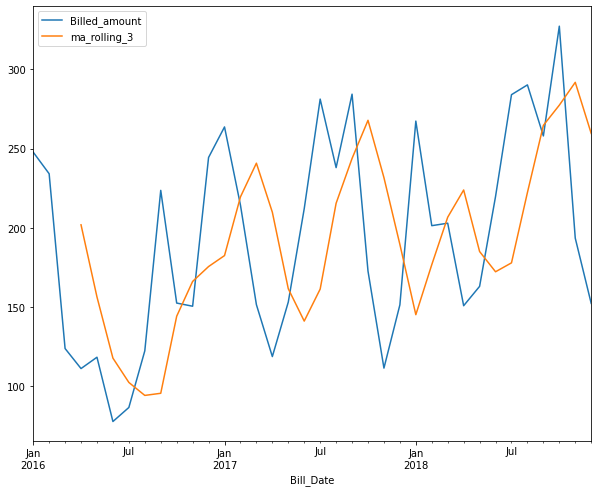

In [45]:
bill_2018.plot()

## Weighted Moving Average

**It gives you the last n data points weighted avg. .. and where you will be assigning the weightage . For example we can simply tell that for the latest data point put a higher weightage and for a previous data point put a lower weightage or vise-versa**

    Recency, frequency, monetary value (RFM) a marketing analysis tool used to identify a firm's best clients, based on the
    nature of their spending habits.
    
    Weighted moving average = ( t * weighting_factor ) + ((t-1)*weighting_factor-1) + ((t-n)*weighting factor-n)/n

#### Custom function for Weighted Moving Average

In [46]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [47]:
# NOW INSTEAD OF APPLYING THE MEAN AFTER THE ROLLING FUNCTION ... HERE YOU NEED TO APPLY THE WEIGHTED AVERAGE

bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5, 1, 1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [48]:
bill_2018['wma_rolling_3'] = bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5, 1, 1.5]))).shift(1)

In [49]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


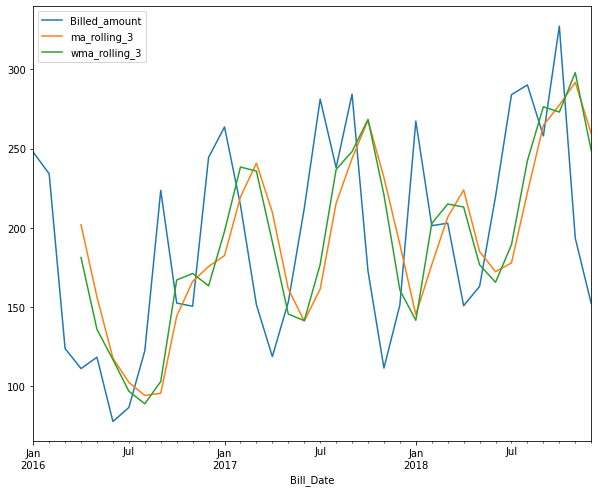

In [50]:
bill_2018.plot()
plt.show()

## Exponential moving average

    It is similar to the weighted moving average!! But we dont have to assign weights here..
    What it does is that it will take the previous period then it will calculate the exponential moving average then 
    it will take the exponential moving average as the next input rather than just taking the t-1, t-2 ... as next inputs
    
   `Exp Moving Avg. = (Close - previous EMA)*(2/(span+1)) + previous EMA`
     
     span = it is the duration for which you want to calculate the EMA for
    
    NOTE : The biggest advantage of the exponential moving average is that it adapts to your data points very 
           Quickly as compared to the weighted or simple moving average(SMA).
           
    

In [58]:
bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

Bill_Date
2016-01-01           NaN
2016-02-01    247.730000
2016-03-01    240.920000
2016-04-01    182.385000
2016-05-01    146.802500
2016-06-01    132.586250
2016-07-01    105.198125
2016-08-01     95.934063
2016-09-01    109.167031
2016-10-01    166.393516
2016-11-01    159.466758
2016-12-01    155.003379
2017-01-01    199.686689
2017-02-01    231.663345
2017-03-01    222.991672
2017-04-01    187.265836
2017-05-01    153.027918
2017-06-01    153.103959
2017-07-01    182.591980
2017-08-01    231.890990
2017-09-01    234.930495
2017-10-01    259.615247
2017-11-01    216.152624
2017-12-01    163.831312
2018-01-01    157.625656
2018-02-01    212.472828
2018-03-01    206.911414
2018-04-01    204.910707
2018-05-01    177.885353
2018-06-01    170.477677
2018-07-01    195.118838
2018-08-01    239.549419
2018-09-01    264.849710
2018-10-01    261.404855
2018-11-01    294.297427
2018-12-01    243.893714
Name: Billed_amount, dtype: float64

In [59]:
bill_2018['ewm_window_3'] = bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

<AxesSubplot:xlabel='Bill_Date'>

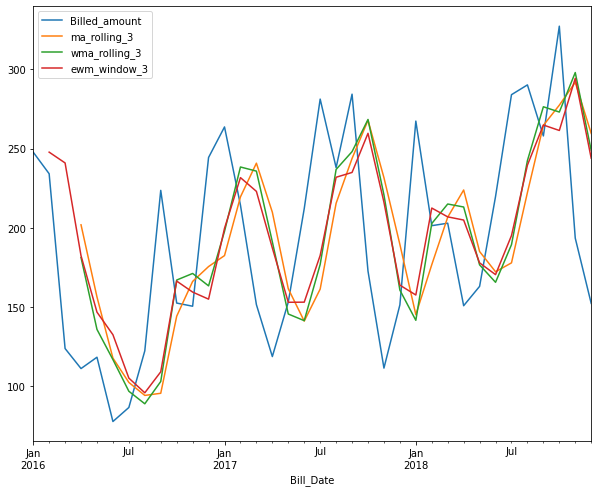

In [66]:
bill_2018.plot()

## Exponential Smoothning

    It requires an additional parameter called Alpha .. which is just the smoothning factor or smoothning coeffecient.
    This factor controls the rate at which we influence the operation of the observations at prior timesteps and allows to
    decay those values exponentially.
    Alpha ranges between 0-1 .. LARGER value of alpha means the model is paying attention to most recent data points
    smaller value of alpla means that it is taking the history into its account
    
    use the same pandas ewm() function but use the alpha parameter instead of the span parameter

In [73]:
bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01           NaN
2016-04-01    158.153800
2016-05-01    125.300140
2016-06-01    120.449042
2016-07-01     90.601713
2016-08-01     87.849514
2016-09-01    112.034854
2016-10-01    190.144456
2016-11-01    163.821337
2016-12-01    154.524401
2017-01-01    217.416320
2017-02-01    249.772896
2017-03-01    224.955869
2017-04-01    173.564761
2017-05-01    135.222428
2017-06-01    147.792728
2017-07-01    192.793819
2017-08-01    254.671146
2017-09-01    242.980344
2017-10-01    271.904103
2017-11-01    202.454231
2017-12-01    138.793269
2018-01-01    147.631981
2018-02-01    231.413594
2018-03-01    210.369078
2018-04-01    205.147723
2018-05-01    167.146317
2018-06-01    164.292895
2018-07-01    203.119869
2018-08-01    259.721961
2018-09-01    281.021588
2018-10-01    264.878476
2018-11-01    308.496543
2018-12-01    227.991963
Name: Billed_amount, dtype: float64

In [74]:
bill_2018['esm_window_3_7'] = bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)

In [91]:
bill_2018.head()

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.7300,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.9200,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.3850,158.15380,207.70580
2016-05-01,118.37,156.393333,135.911667,146.8025,125.30014,178.76006


<AxesSubplot:xlabel='Bill_Date'>

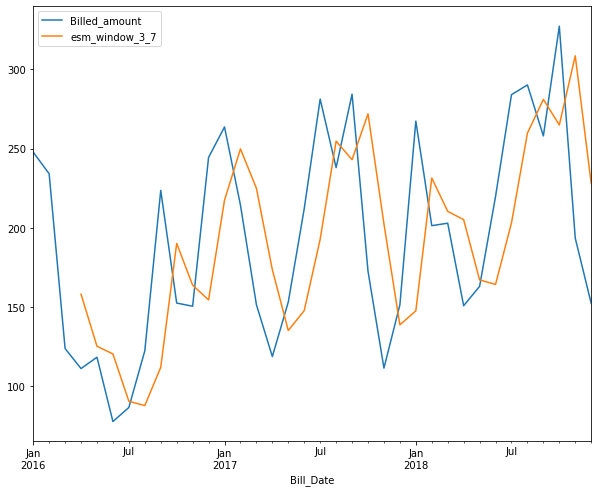

In [77]:
bill_2018[['Billed_amount', 'esm_window_3_7']].plot()

In [90]:
bill_2018['esm_window_3_3'] = bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False, min_periods=3).mean().shift(1)
bill_2018.head()

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.7300,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.9200,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.3850,158.15380,207.70580
2016-05-01,118.37,156.393333,135.911667,146.8025,125.30014,178.76006


### NOTE : The lower alpha value is able to capture the variations more as compared to the higher alpha value. but lower alpha value is producing more smoothness!!

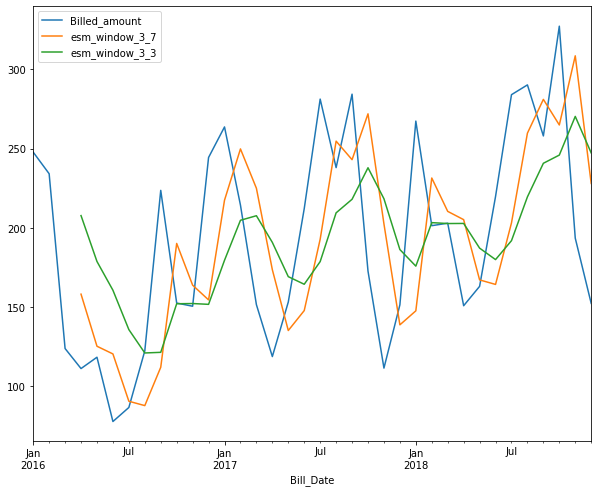

In [81]:
bill_2018[['Billed_amount' ,'esm_window_3_7', 'esm_window_3_3']].plot()
plt.show()

In [84]:
bill_2018.head()

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.7300,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.9200,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.3850,158.15380,207.70580
2016-05-01,118.37,156.393333,135.911667,146.8025,125.30014,178.76006


# RMSE

    sum((y - y_hat)^2 / n)

In [85]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.98561687433802

In [86]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

65.82572602256133

In [87]:
((bill_2018['Billed_amount']-bill_2018['ewm_window_3'])**2).mean()**0.5

64.32131239414655

In [88]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_7'])**2).mean()**0.5

61.26408398853503

In [89]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_3'])**2).mean()**0.5

65.22424423118377